256


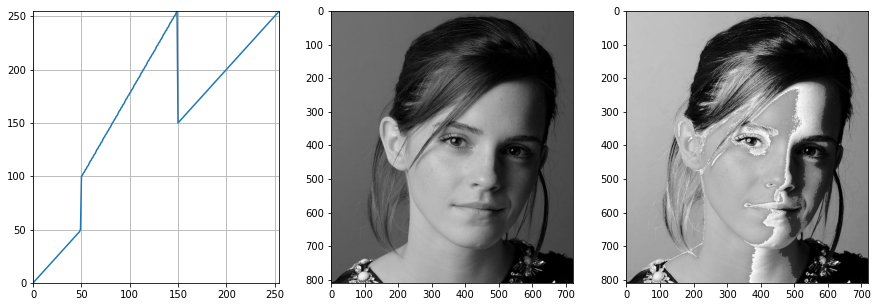

In [29]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('emma_gray.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

t1 = np.linspace(0, 50, 50)
t2 = np.linspace(100, 255, 100)
t3 = np.linspace(150, 255, 106)
t = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)
print(len(t))
filtered_image = cv.LUT(image, t)

fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].plot(t)
ax[0].grid(True)
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[1].imshow(image)
ax[2].imshow(filtered_image)
plt.show()